# Hamoye Capstone project - Winter Olympics

## By Sumit Redekar

### 1. Problem Statement
To predict cities that are likely to win medals (Gold, Silver, Bronze). 

### 2. Dataset 
Dataset taken from **Kaggle** - https://www.kaggle.com/the-guardian/olympic-games

### 3. Evaluation
Metrics used to evaluate the model performance are: accuracy, precision and f1 score.

### Getting Started


In [4]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
data = pd.read_csv('winter.csv')

In [6]:
data.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold


### Exploratory Data Analysis

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5770 entries, 0 to 5769
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        5770 non-null   int64 
 1   City        5770 non-null   object
 2   Sport       5770 non-null   object
 3   Discipline  5770 non-null   object
 4   Athlete     5770 non-null   object
 5   Country     5770 non-null   object
 6   Gender      5770 non-null   object
 7   Event       5770 non-null   object
 8   Medal       5770 non-null   object
dtypes: int64(1), object(8)
memory usage: 405.8+ KB


In [8]:
data.describe()

,Year
count,5770.000000
mean,1986.350433
std,24.263673
min,1924.000000
25%,1972.000000
50%,1994.000000
75%,2006.000000
max,2014.000000


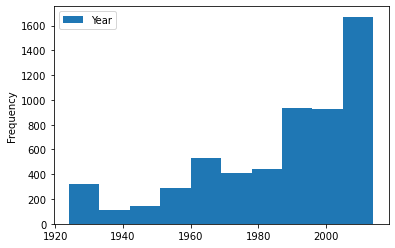

In [10]:
data.plot(kind='hist');

#### Converting categorical features into numeric features with Ordinal Encoding

In [29]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [37]:
#copy of og data
data_tmp = data.copy()

In [38]:
data.columns

Index(['Year', 'City', 'Sport', 'Discipline', 'Athlete', 'Country', 'Gender',
       'Event', 'Medal'],
      dtype='object')

In [39]:
categorical_features = ['City', 'Sport', 'Discipline', 'Athlete', 'Country', 'Gender','Event', 'Medal']
ordinal = OrdinalEncoder()
data_tmp[categorical_features] = ordinal.fit_transform(data[categorical_features])

In [40]:
data_tmp

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,2.0,0.0,1.0,280.0,15.0,0.0,57.0,0.0
1,1924,2.0,0.0,1.0,2075.0,15.0,0.0,57.0,0.0
2,1924,2.0,0.0,1.0,2076.0,15.0,0.0,57.0,0.0
3,1924,2.0,0.0,1.0,3456.0,15.0,0.0,57.0,0.0
4,1924,2.0,0.0,1.0,152.0,36.0,0.0,57.0,1.0
...,...,...,...,...,...,...,...,...,...
5765,2014,14.0,6.0,13.0,1477.0,17.0,1.0,69.0,0.0
5766,2014,14.0,6.0,13.0,77.0,42.0,1.0,69.0,1.0
5767,2014,14.0,6.0,13.0,2067.0,5.0,1.0,70.0,2.0
5768,2014,14.0,6.0,13.0,2882.0,8.0,1.0,70.0,1.0


In [42]:
data_tmp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5770 entries, 0 to 5769
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        5770 non-null   int64  
 1   City        5770 non-null   float64
 2   Sport       5770 non-null   float64
 3   Discipline  5770 non-null   float64
 4   Athlete     5770 non-null   float64
 5   Country     5770 non-null   float64
 6   Gender      5770 non-null   float64
 7   Event       5770 non-null   float64
 8   Medal       5770 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 405.8 KB


In [43]:
data_tmp.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       0
Gender        0
Event         0
Medal         0
dtype: int64

After converting all categorical features into numerical features our data is now ready for modeling

### Modeling

In [50]:
#getting our X and y
X = data_tmp.drop('City',axis=1)
y = data_tmp['City']

In [51]:
from  sklearn.model_selection import train_test_split

#splitting X and y in training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
X_train.shape, y_train.shape

((4616, 8), (4616,))

In [54]:
X_test.shape, y_test.shape

((1154, 8), (1154,))

In [56]:
#importing models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

In [65]:
#importing metrics 
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

In [66]:
models = {
    'Logistic': LogisticRegression(),
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'Ada': AdaBoostClassifier(),
    'KNeighbors': KNeighborsClassifier(),
    'CatBoost': CatBoostClassifier(silent=True),
    'XGB': XGBClassifier()
}

In [74]:
def fit_score(models,X_train,X_test,y_train,y_test):
    for name,model in models.items():
        #fitting our model
        model.fit(X_train,y_train)
        print(f'Fitting {name} !!')
        
        #accuracy
        score = model.score(X_test,y_test)
        print(f'Accuracy of {name} is {score}.')

In [75]:
fit_score(models=models,
          X_train=X_train,
          X_test=X_test,
          y_train=y_train,
          y_test=y_test
         )

C:\Users\6\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting Logistic !!
Accuracy of Logistic is 0.10571923743500866.
Fitting RandomForest !!
Accuracy of RandomForest is 0.8708838821490468.
Fitting GradientBoosting !!
Accuracy of GradientBoosting is 1.0.
Fitting Ada !!
Accuracy of Ada is 0.462738301559792.
Fitting KNeighbors !!
Accuracy of KNeighbors is 0.22357019064124783.
Fitting CatBoost !!
Accuracy of CatBoost is 1.0.
[16:11:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\6\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting XGB !!
Accuracy of XGB is 1.0.


Let's fit this four models i.e. **RandomForest**, **Catboost**, **XGB**, **GradientBoosting** and then evaluate on various metrics

#### Performing Cross Validation 

In [79]:
import warnings
warnings.filterwarnings("ignore")

In [83]:
#evaluating our RandomForest model on cross-validation dataset
model_1 = RandomForestClassifier()
model_1_acc = cross_val_score(model_1, X, y, cv=5, scoring='accuracy')
model_1_acc.mean()

0.49930675909878686

In [86]:
#evaluating our GradientBoosting model on cross-validation dataset
model_2 = GradientBoostingClassifier()
model_2_acc = cross_val_score(model_2, X, y, cv=5, scoring='accuracy')
model_2_acc.mean()

1.0

In [88]:
#evaluating our CatBoost model on cross-validation dataset
model_3 = CatBoostClassifier(silent=True)
model_3_acc = cross_val_score(model_3, X, y, cv=5, scoring='accuracy')
model_3_acc.mean()

1.0

In [90]:
#evaluating our XGB model on cross-validation dataset
model_4 = XGBClassifier()
model_4_acc = cross_val_score(model_4, X, y, cv=5, scoring='accuracy')
model_4_acc.mean()

[16:31:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:31:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:31:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:31:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

1.0

Now we will make predicitions on test data and evaluating precision and recall on all 3 models i.e. GradientBoosting, Catboost, XGB

But for making predicitons we need to fit the model first, we haven't done that yet.

#### Predicting and getting Precision and recall

In [95]:
#GradientBoosting
model_2 = GradientBoostingClassifier()
model_2.fit(X_train, y_train)
preds_2 = model_2.predict(X_test)
precision_2 = precision_score(y_test, preds_2,average='micro')
recall_2 = recall_score(y_test, preds_2, average='micro')
print(f'Precison: {precision_2}')
print(f'Recall: {recall_2}')

Precison: 1.0
Recall: 1.0


In [97]:
#CatBoost
model_3 = CatBoostClassifier(silent=True)
model_3.fit(X_train, y_train)
preds_3 = model_3.predict(X_test)
precision_3 = precision_score(y_test, preds_3,average='micro')
recall_3 = recall_score(y_test, preds_3, average='micro')
print(f'Precison: {precision_3}')
print(f'Recall: {recall_3}')

Precison: 1.0
Recall: 1.0


In [98]:
#XGB
model_4 = XGBClassifier()
model_4.fit(X_train, y_train)
preds_4 = model_4.predict(X_test)
precision_4 = precision_score(y_test, preds_4,average='micro')
recall_4 = recall_score(y_test, preds_4, average='micro')
print(f'Precison: {precision_4}')
print(f'Recall: {recall_4}')

[16:45:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Precison: 1.0
Recall: 1.0


All the three models i.e. **GradientBoostingClassifier**, **CatBoostClassifier** and **XGBClassifier** performs same.

#### Classification report

In [101]:
print("CLASSIFICATION REPORT OF GRADIENT BOOSTING CLASSIFIER")
print(classification_report(y_test,preds_2))

CLASSIFICATION REPORT OF GRADIENT BOOSTING CLASSIFIER
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        67
         1.0       1.00      1.00      1.00        49
         2.0       1.00      1.00      1.00        30
         3.0       1.00      1.00      1.00        33
         4.0       1.00      1.00      1.00        25
         5.0       1.00      1.00      1.00        35
         6.0       1.00      1.00      1.00        88
         7.0       1.00      1.00      1.00        66
         8.0       1.00      1.00      1.00        69
         9.0       1.00      1.00      1.00        82
        10.0       1.00      1.00      1.00        26
        11.0       1.00      1.00      1.00        86
        12.0       1.00      1.00      1.00        46
        13.0       1.00      1.00      1.00        43
        14.0       1.00      1.00      1.00       125
        15.0       1.00      1.00      1.00        23
        16.0       1.00    

In [103]:
print("CLASSIFICATION REPORT OF CATBOOST CLASSIFIER")
print(classification_report(y_test,preds_3))

CLASSIFICATION REPORT OF CATBOOST CLASSIFIER
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        67
         1.0       1.00      1.00      1.00        49
         2.0       1.00      1.00      1.00        30
         3.0       1.00      1.00      1.00        33
         4.0       1.00      1.00      1.00        25
         5.0       1.00      1.00      1.00        35
         6.0       1.00      1.00      1.00        88
         7.0       1.00      1.00      1.00        66
         8.0       1.00      1.00      1.00        69
         9.0       1.00      1.00      1.00        82
        10.0       1.00      1.00      1.00        26
        11.0       1.00      1.00      1.00        86
        12.0       1.00      1.00      1.00        46
        13.0       1.00      1.00      1.00        43
        14.0       1.00      1.00      1.00       125
        15.0       1.00      1.00      1.00        23
        16.0       1.00      1.00   

In [104]:
print("CLASSIFICATION REPORT OF XGB CLASSIFIER")
print(classification_report(y_test,preds_4))

CLASSIFICATION REPORT OF XGB CLASSIFIER
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        67
         1.0       1.00      1.00      1.00        49
         2.0       1.00      1.00      1.00        30
         3.0       1.00      1.00      1.00        33
         4.0       1.00      1.00      1.00        25
         5.0       1.00      1.00      1.00        35
         6.0       1.00      1.00      1.00        88
         7.0       1.00      1.00      1.00        66
         8.0       1.00      1.00      1.00        69
         9.0       1.00      1.00      1.00        82
        10.0       1.00      1.00      1.00        26
        11.0       1.00      1.00      1.00        86
        12.0       1.00      1.00      1.00        46
        13.0       1.00      1.00      1.00        43
        14.0       1.00      1.00      1.00       125
        15.0       1.00      1.00      1.00        23
        16.0       1.00      1.00      1.

#### Feature Importance

In [127]:
importances = model_2.feature_importances_

In [128]:
imp = pd.DataFrame(index=categorical_features)
imp['Importance'] = importances

In [129]:
imp

,Importance
City,1.000000e+00
Sport,4.461742e-21
Discipline,2.527410e-17
Athlete,6.115285e-15
Country,2.011226e-17
Gender,8.503604e-17
Event,3.655671e-17
Medal,-1.452550e-17
